In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [1]:
from mc_simulation.mc_class import MC
mc_params = {
    "N_experiments": 10, # number of experiments

    "parallel": {
        "n_jobs": 10,
        "verbose": 11
    },

    "experiment": {
        "cluster_number_range": (1,6),
        "min_datapoints": 5
    },

    "em": {
        "em_algorithm": {
            "max_iter": 100,
            "em_tol": 1e-5,
            "min_mix_coef": 0.02
        }
    },


    "cluster_init": {
        "N_cluster_max": 3,
        "N_runs_per_clusternumber": 2
    }
}


mc = MC(**mc_params)
mc.simulate_experiments()


In [2]:
mc.run()
df_results, model_data = mc.df_results, mc.model_data

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    5.3s remaining:   21.5s
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    5.8s remaining:   13.6s
[Parallel(n_jobs=10)]: Done   4 out of  10 | elapsed:    6.5s remaining:    9.8s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    6.9s remaining:    6.9s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    7.5s remaining:    5.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    7.6s remaining:    3.2s
[Parallel(n_jobs=10)]: Done   8 out of  10 | elapsed:    8.4s remaining:    2.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.8s finished


In [ ]:
from mc_simulation.scoreboard import create_scoreboard
from mc_simulation.post_processing import include_number_of_correctly_identified_cluster

df_scores, df_scores_singular = create_scoreboard(df_results, model_data)
df_scores = include_number_of_correctly_identified_cluster(df_scores, model_data)

In [ ]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 30
init_routine = "random_inside"
criterion = "AIC"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
df_select.head(25)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,22,75,1.352957,-319.967510,331.967510,350.343080,338.749662,0.435028,377.280404,3,2,1,1,1,8,1,14,1,0.979633,1,random_inside,30,5,2.0
5,40,135,2.316272,-319.939655,339.939655,370.565605,345.353427,0.418869,292.701250,5,1,2,9,2,9,7,30,2,0.934992,6,random_inside,30,5,3.0
8,41,500,7.677209,-320.489729,340.489729,371.115679,346.947744,0.365739,257.114699,5,3,3,15,3,14,12,50,8,0.913866,9,random_inside,30,5,5.0
1,23,54,1.038958,-330.551549,342.551549,360.927119,347.914368,0.488866,191.079429,3,12,4,4,4,2,22,48,7,0.948162,2,random_inside,30,5,1.0
2,36,328,3.410022,-328.039384,344.039384,368.540145,351.468195,0.483068,311.351246,4,9,5,6,11,3,3,37,3,0.935223,3,random_inside,30,5,4.0
3,33,292,2.234441,-328.039418,344.039418,368.540178,351.468228,0.483068,311.351246,4,10,6,7,12,3,2,40,4,0.935222,4,random_inside,30,5,4.0
4,35,304,1.840744,-328.040694,344.040694,368.541455,351.469455,0.483068,311.351246,4,11,7,8,13,3,2,44,5,0.935216,5,random_inside,30,5,4.0
6,19,77,0.501458,-336.099687,344.099687,356.350067,351.176758,0.445240,302.913464,2,19,8,2,7,6,5,47,6,0.925985,7,random_inside,30,5,1.0
7,15,80,0.509424,-336.099714,344.099714,356.350094,351.176784,0.445240,302.913464,2,20,9,3,8,6,5,51,9,0.925985,8,random_inside,30,5,1.0
9,49,193,3.133234,-324.900814,344.900814,375.526764,351.392483,0.397429,269.851712,5,5,10,21,9,11,10,66,10,0.902998,10,random_inside,30,5,5.0


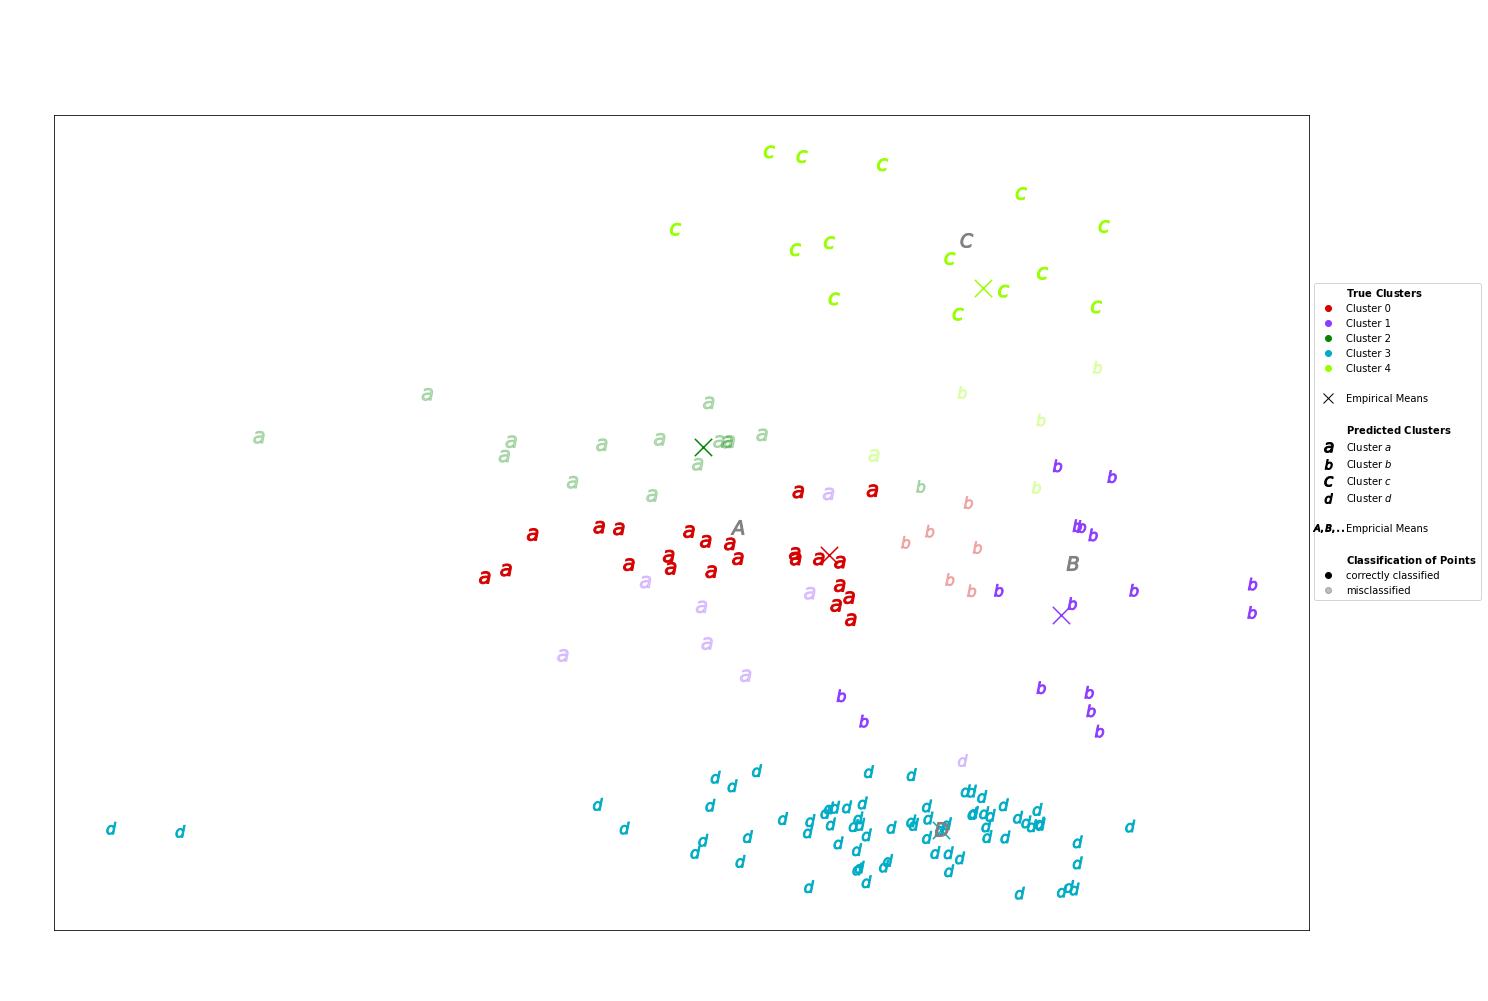

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
init_routine = "random_inside"
dataset = 30
param_idx = 36
criterion = "TOTAL_rank"

plot_clustering_assessment(run_data, run_results, init_routine, dataset, criterion, param_idx=param_idx)